<a href="https://colab.research.google.com/github/RodjonSobiani/ml_learning/blob/main/SimpleCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive / MyDrive / data / simplecv_data.zip

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [22]:
# Local files
# img = image.load_img("../ml_learning/simplecv/train/Dog/4.jpg")

# Drive files
# matplotlib
# img = image.load_img("/content/train/Dog/4.jpg")

# pillow
im = Image.open("/content/train/Dog/4.jpg")

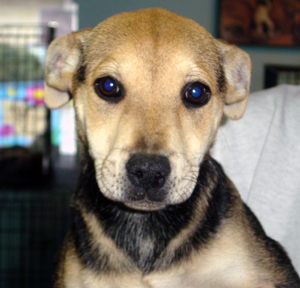

In [23]:
# plt.imshow(img)
display(im)

In [16]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../content/train/Cat").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

../content/train/Cat/666.jpg


In [31]:
!rm '../content/train/Cat/666.jpg'

rm: cannot remove '../content/train/Cat/666.jpg': No such file or directory


In [32]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../content/train/Cat").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [24]:
train = ImageDataGenerator(rescale=1 / 255)
test = ImageDataGenerator(rescale=1 / 255)

In [25]:
train_dataset = train.flow_from_directory(
    # "../ml_learning/simplecv/train/",
    "../content/train/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 8001 images belonging to 2 classes.


In [26]:
test_dataset = test.flow_from_directory(
    # "../ml_learning/simplecv/test/",
    "../content/test/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [27]:
test_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [28]:
model = keras.Sequential()

In [29]:
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(
    train_dataset,
    steps_per_epoch=250,
    epochs=10,
    validation_data=test_dataset,
)

Epoch 1/10
250/250 [==============================] - 35s 138ms/step - loss: 0.6891 - accuracy: 0.5446 - val_loss: 0.6702 - val_accuracy: 0.5990
Epoch 2/10
250/250 [==============================] - 33s 134ms/step - loss: 0.6491 - accuracy: 0.6106 - val_loss: 0.6155 - val_accuracy: 0.6620
Epoch 3/10
250/250 [==============================] - 33s 133ms/step - loss: 0.6107 - accuracy: 0.6616 - val_loss: 0.6014 - val_accuracy: 0.6860
Epoch 4/10
250/250 [==============================] - 33s 134ms/step - loss: 0.5612 - accuracy: 0.7059 - val_loss: 0.5327 - val_accuracy: 0.7420
Epoch 5/10
250/250 [==============================] - 34s 134ms/step - loss: 0.5026 - accuracy: 0.7493 - val_loss: 0.4931 - val_accuracy: 0.7753
Epoch 6/10
250/250 [==============================] - 34s 134ms/step - loss: 0.4595 - accuracy: 0.7820 - val_loss: 0.4646 - val_accuracy: 0.7823
Epoch 7/10
250/250 [==============================] - 33s 134ms/step - loss: 0.4079 - accuracy: 0.8139 - val_loss: 0.4567 - val_ac

In [34]:
model.save('model.h5')

In [35]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [36]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150, 150))

    plt.imshow(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:

        plt.xlabel("DOG", fontsize=30)


    elif val == 0:

        plt.xlabel("CAT", fontsize=30)

[[1.]]


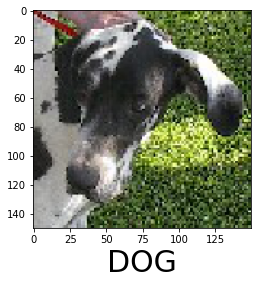

In [37]:
predictImage("/content/train/Dog/2139.jpg")